# Predicting Renewable Electricity Outputs of different countries

### DSCI310 March 2nd, 2024 
Collaborators

## Summary

put here

## Introduction 

put here

## Methods and Results

put here

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import set_config
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [9]:
#Reading the data in 
URL = urllib2.urlopen("https://databank.worldbank.org/data/download/WDI_CSV.zip").read()
file = ZipFile(BytesIO(URL))
data_csv = file.open("WDIData.csv")
data = pd.read_csv(data_csv)
data.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285,30.998687,32.772690,NaN,NaN


In [10]:

#This is tidying the data, and making it usable for analysis 

#2015 was chosen as it was the most recent year in which there was the most values for the target variable

data3=pd.pivot_table(data, index= 'Country Name', values='2015', columns='Indicator Name')

data3.columns

data4= data3[['Access to electricity (% of population)', 'Adjusted savings: carbon dioxide damage (current US$)', 
             'Adjusted net national income (constant 2015 US$)', 'Adjusted savings: carbon dioxide damage (current US$)'
             ,'Agricultural land (% of land area)', 'CO2 emissions (kt)', 'Death rate, crude (per 1,000 people)'
              ,'Land area (sq. km)','Methane emissions (kt of CO2 equivalent)',
             'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)','Population, total','Renewable energy consumption (% of total final energy consumption)',
             'Renewable electricity output (% of total electricity output)','Rural population']]



In [11]:
#to keep this at the level of a DSCI100 project, NaN values were replaced with 0 instead of using a Standard Scaler, or another imputer method. 

data4=data4.fillna(0)

<Axes: xlabel='Access to electricity (% of population)', ylabel='Renewable electricity output (% of total electricity output)'>

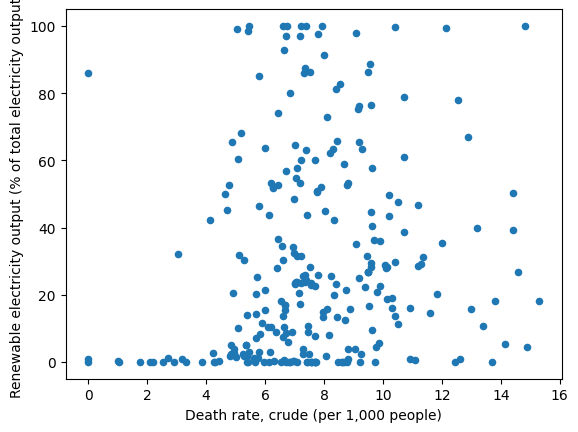

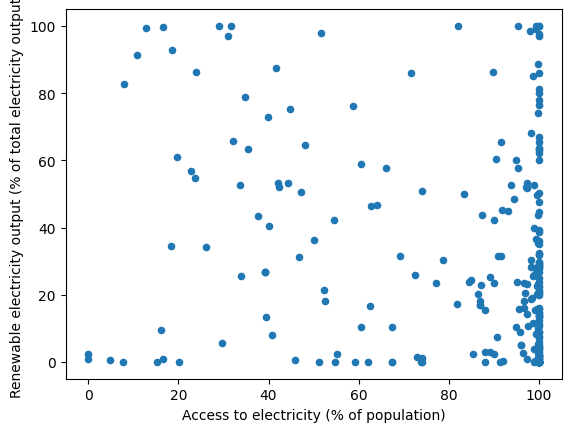

In [25]:


data4.plot.scatter(x='Death rate, crude (per 1,000 people)', y='Renewable electricity output (% of total electricity output)')
data4.plot.scatter(x='Access to electricity (% of population)', y='Renewable electricity output (% of total electricity output)')



In [13]:
#split data into training and testing

energy_train, energy_test= train_test_split(data4, train_size=0.75)


energy_train_x= energy_train.drop('Renewable electricity output (% of total electricity output)', axis=1)
energy_train_y= energy_train[["Renewable electricity output (% of total electricity output)"]]

energy_test_x= energy_test.drop('Renewable electricity output (% of total electricity output)', axis=1)
energy_test_y= energy_test[["Renewable electricity output (% of total electricity output)"]]





In [14]:
# ct = make_column_transformer(    
#     (StandardScaler(), numeric_feats))

# ct.fit_transform(energy_train_x)

energy_train_x=energy_train_x.fillna(0)
energy_train_y= energy_train_y.fillna(0)

energy_train_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, Northern Mariana Islands to Channel Islands
Data columns (total 13 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Access to electricity (% of population)                                 198 non-null    float64
 1   Adjusted savings: carbon dioxide damage (current US$)                   198 non-null    float64
 2   Adjusted net national income (constant 2015 US$)                        198 non-null    float64
 3   Adjusted savings: carbon dioxide damage (current US$)                   198 non-null    float64
 4   Agricultural land (% of land area)                                      198 non-null    float64
 5   CO2 emissions (kt)                                                      198 non-null    float64
 6   Death rate, crude (per 1,000 people)                

In [15]:
#making the linear model
lm=LinearRegression()
lm.fit(energy_train_x, energy_train_y)

LinearRegression()

In [16]:
#predict on test 
lm.score(energy_test_x,energy_test_y)


0.34824715293064046